In [28]:
import datetime 
import warnings
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import sklearn

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
delay = pd.read_csv('flights.csv')

In [3]:
delay.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
delay = delay[delay['MONTH'] == 1]

In [5]:
variables_to_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR', 
                       'MONTH','DAY','DAY_OF_WEEK', 'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME','AIRLINE', 'ORIGIN_AIRPORT', 
                       'DESTINATION_AIRPORT']
delay.drop(variables_to_remove, axis = 1, inplace = True)
delay = delay[['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME']]
delay[:5]

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
0,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0
1,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0
2,20,18.0,-2.0,806,811.0,5.0,286.0,293.0
3,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0
4,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0


In [6]:
missing_delay = delay.isnull().sum(axis=0).reset_index()
missing_delay.columns = ['variable', 'missing values']
missing_delay['filling factor (%)']=(delay.shape[0]-missing_delay['missing values'])/delay.shape[0]*100
missing_delay.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ARRIVAL_DELAY,12955,97.243429
1,ELAPSED_TIME,12955,97.243429
2,ARRIVAL_TIME,12271,97.388971
3,DEPARTURE_TIME,11657,97.519618
4,DEPARTURE_DELAY,11657,97.519618
5,SCHEDULED_DEPARTURE,0,100.000000
6,SCHEDULED_ARRIVAL,0,100.000000
7,SCHEDULED_TIME,0,100.000000


In [7]:
delay.dropna(inplace=True)

In [20]:
x = delay.drop('DEPARTURE_DELAY', axis=1)
regr = linear_model.LinearRegression(normalize=True)
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [21]:
regr.fit(x, delay['DEPARTURE_DELAY'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [22]:
print ('Estimated intercept coefficients:', regr.intercept_)

Estimated intercept coefficients: -8.384404281969182e-13


In [23]:
print ('Number of coeffients:', len(regr.coef_))

Number of coeffients: 7


In [24]:
regr.score(x, delay['DEPARTURE_DELAY'])

1.0

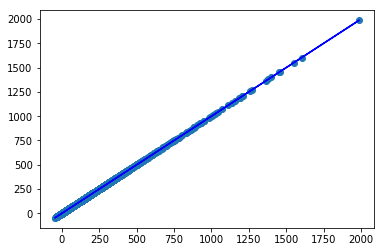

In [26]:
plt.scatter(delay['DEPARTURE_DELAY'], regr.predict(x))
plt.plot(regr.predict(x), delay['DEPARTURE_DELAY'], color='blue')
plt.show()

In [29]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, delay['DEPARTURE_DELAY'] ,test_size=0.33, random_state = 5)

print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(306198, 7)
(150815, 7)
(306198,)
(150815,)


In [30]:
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)
pred_train = lm.predict(x_train)
pred_test = lm.predict(x_test)

In [31]:
print ('Fit a model X_train, and calculate MSE with y_train:', np.mean((y_train - lm.predict(x_train)) ** 2))
print ('Fit a model X_train, and calculate MSE with X_test, y_test:', np.mean((y_test - lm.predict(x_test)) ** 2))

Fit a model X_train, and calculate MSE with y_train: 1.1142644520261398e-25
Fit a model X_train, and calculate MSE with X_test, y_test: 1.166262881371121e-25


Text(0,0.5,'Residuals')

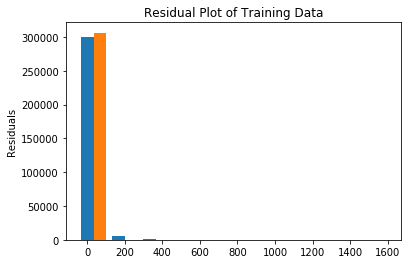

In [32]:
train_residuals = (lm.predict(x_train), lm.predict(x_train) - y_train)
test_residuals = (lm.predict(x_test), lm.predict(x_test) - y_test)
plt.hist(train_residuals)
plt.title('Residual Plot of Training Data')
plt.ylabel('Residuals')

Text(0.5,1,'Residual Plot of Test Data')

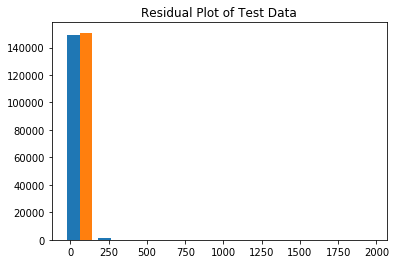

In [33]:
plt.hist(test_residuals)
plt.title('Residual Plot of Test Data')

In [34]:
correlation_matrix = x.corr()
display(correlation_matrix)

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
SCHEDULED_DEPARTURE,1.000000,0.972902,0.767655,0.684476,0.084720,-0.033791,-0.037701
DEPARTURE_TIME,0.972902,1.000000,0.769046,0.697539,0.159634,-0.037115,-0.040080
SCHEDULED_ARRIVAL,0.767655,0.769046,1.000000,0.870709,0.079126,0.047080,0.043580
ARRIVAL_TIME,0.684476,0.697539,0.870709,1.000000,0.063867,0.031343,0.031611
ARRIVAL_DELAY,0.084720,0.159634,0.079126,0.063867,1.000000,-0.046746,0.023754
SCHEDULED_TIME,-0.033791,-0.037115,0.047080,0.031343,-0.046746,1.000000,0.983202
ELAPSED_TIME,-0.037701,-0.040080,0.043580,0.031611,0.023754,0.983202,1.000000


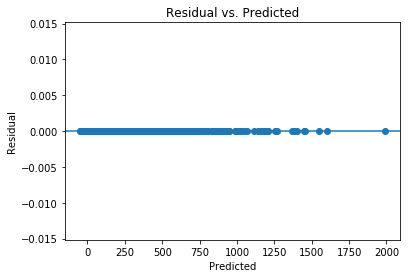

In [36]:
predicted = regr.predict(x).ravel()
actual = delay['DEPARTURE_DELAY']

residual = actual - predicted

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [37]:
# ??